## Assignment 1.3C

### Bevan Fairleigh

Deakin University 219296864


GitHub [link](https://github.com/bevanyeah/assignments/)!
https://github.com/bevanyeah/assignments/

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [13]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

Run the following cell to load the packages you will need.

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [15]:
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)

Now, let's split the data into training and test sets.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [17]:
#Create Classification Model : Feed Forward Neural Network
#Input size: 512 (number of features)
#Output size: 1 (our classification)

model = Sequential()
model.add(Dense(500, input_dim=512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training

Now, let's start our training.

In [18]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

Epoch 1/200
3825/3825 [==============================] - 1s 285us/step - loss: 0.1618 - accuracy: 0.9357
Epoch 2/200
3825/3825 [==============================] - 0s 122us/step - loss: 0.0127 - accuracy: 0.9997
Epoch 3/200
3825/3825 [==============================] - 1s 131us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 4/200
3825/3825 [==============================] - 0s 127us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 5/200
3825/3825 [==============================] - 0s 124us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 6/200
3825/3825 [==============================] - 1s 133us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/200
3825/3825 [==============================] - 0s 123us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 8/200
3825/3825 [==============================] - 0s 116us/step - loss: 8.9625e-04 - accuracy: 1.0000
Epoch 9/200
3825/3825 [==============================] - 0s 114us/step - loss: 7.2022e-04 - accuracy: 1.0000
Epoch 10/200
3825/3825 [=======================

3825/3825 [==============================] - 0s 117us/step - loss: 7.0535e-06 - accuracy: 1.0000
Epoch 76/200
3825/3825 [==============================] - 0s 116us/step - loss: 6.7782e-06 - accuracy: 1.0000
Epoch 77/200
3825/3825 [==============================] - 0s 115us/step - loss: 6.5148e-06 - accuracy: 1.0000
Epoch 78/200
3825/3825 [==============================] - 0s 115us/step - loss: 6.2632e-06 - accuracy: 1.0000
Epoch 79/200
3825/3825 [==============================] - 0s 117us/step - loss: 6.0225e-06 - accuracy: 1.0000
Epoch 80/200
3825/3825 [==============================] - 0s 116us/step - loss: 5.7908e-06 - accuracy: 1.0000
Epoch 81/200
3825/3825 [==============================] - 0s 117us/step - loss: 5.5719e-06 - accuracy: 1.0000
Epoch 82/200
3825/3825 [==============================] - 0s 116us/step - loss: 5.3582e-06 - accuracy: 1.0000
Epoch 83/200
3825/3825 [==============================] - 0s 117us/step - loss: 5.1577e-06 - accuracy: 1.0000
Epoch 84/200
3825/3825 

3825/3825 [==============================] - 0s 118us/step - loss: 5.1217e-07 - accuracy: 1.0000
Epoch 150/200
3825/3825 [==============================] - 0s 119us/step - loss: 4.9558e-07 - accuracy: 1.0000
Epoch 151/200
3825/3825 [==============================] - 0s 119us/step - loss: 4.7963e-07 - accuracy: 1.0000
Epoch 152/200
3825/3825 [==============================] - 0s 118us/step - loss: 4.6408e-07 - accuracy: 1.0000
Epoch 153/200
3825/3825 [==============================] - 0s 119us/step - loss: 4.4918e-07 - accuracy: 1.0000
Epoch 154/200
3825/3825 [==============================] - 0s 119us/step - loss: 4.3477e-07 - accuracy: 1.0000
Epoch 155/200
3825/3825 [==============================] - 0s 119us/step - loss: 4.2089e-07 - accuracy: 1.0000
Epoch 156/200
3825/3825 [==============================] - 0s 119us/step - loss: 4.0740e-07 - accuracy: 1.0000
Epoch 157/200
3825/3825 [==============================] - 0s 120us/step - loss: 3.9437e-07 - accuracy: 1.0000
Epoch 158/200
3

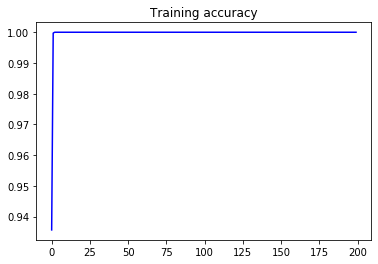

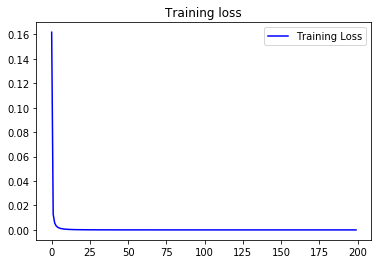

In [19]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set.

In [21]:
from sklearn.metrics import accuracy_score

# Run predictions using the trained model on test data
predictions = model.predict_classes(X_test)

print(f"The Accuracy of our model on the test data is {accuracy_score(y_test,predictions)*100:.2f}%")


The Accuracy of our model on the test data is 100.00%


# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

